In [1]:
import os
os.getcwd()

'C:\\Users\\has91\\anaconda3\\DataScience\\project\\code'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system..')
    
import numpy as np


import plotly_express as px
import seaborn as sns

In [3]:
TeamStats_Spring = pd.read_csv('../data/LCK_2021_Match_data/LCK 2021 Spring - Team Stats - OraclesElixir.csv')
                        #/LCK_2021_Match_data/LCK 2021 Spring - Team Stats - OraclesElixir.csv')
TeamStats_Spring.head()

,Team,GP,W,L,AGT,K,D,KD,CKPM,GPR,...,FD%,DRG%,ELD%,FBN%,BN%,LNE%,JNG%,WPM,CWPM,WCPM
0,Afreeca Freecs,42,16,26,33.5,509,579,0.88,0.77,0.15,...,55%,54%,29%,40%,41%,49.4%,48.5%,3.73,1.52,1.87
1,DRX,47,21,26,33.7,518,599,0.86,0.71,-0.34,...,32%,41%,50%,49%,48%,49.9%,50.5%,3.73,1.34,1.75
2,DWG KIA,43,33,10,33.3,647,486,1.33,0.79,0.82,...,51%,65%,60%,70%,74%,49.5%,56.3%,3.81,1.48,1.78
3,Fredit BRION,39,12,27,32.8,361,469,0.77,0.65,-1.10,...,54%,46%,40%,28%,33%,49.1%,46.5%,3.97,1.55,1.94
4,Gen.G,44,29,15,32.3,547,435,1.26,0.69,0.69,...,68%,56%,50%,73%,72%,51.1%,51.5%,4.03,1.57,1.98


In [5]:
LCK_Spring = pd.read_excel('../data/LCK_2021_Match_data/url_LCK2021_SeasonSpring_Season.xlsx')
LCK_Spring.head()

,gamedate,gameduration,Play_side,W/L,Total_gold,Total_kill,Ban,Ban.1,Ban.2,Ban.3,...,Wards Placed,Wards Destroyed,Stealth Wards Purchased,Control Wards Purchased,Gold Earned,Gold Spent,Minions Killed,Neutral Minions Killed,Neutral Minions Killed in Team's Jungle,Neutral Minions Killed in Enemy Jungle
0,1/13/2021,36:17,blue,VICTORY,73.1k,19,Samira,Akali,Olaf,Lucian,...,11,24,-,8,18.4k,17.6k,283,52,14,20
1,1/13/2021,36:17,blue,VICTORY,73.1k,19,Samira,Akali,Olaf,Lucian,...,43,27,-,12,13.4k,11.7k,51,222,128,26
2,1/13/2021,36:17,blue,VICTORY,73.1k,19,Samira,Akali,Olaf,Lucian,...,19,17,-,14,15.0k,13.7k,290,29,16,8
3,1/13/2021,36:17,blue,VICTORY,73.1k,19,Samira,Akali,Olaf,Lucian,...,19,11,-,11,17.5k,17.2k,376,26,17,4
4,1/13/2021,36:17,blue,VICTORY,73.1k,19,Samira,Akali,Olaf,Lucian,...,67,28,-,20,8.8k,8.8k,56,-,-,-


In [6]:
LCK_Spring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gamedate                                 2020 non-null   object 
 1   gameduration                             2020 non-null   object 
 2   Play_side                                2020 non-null   object 
 3   W/L                                      2020 non-null   object 
 4   Total_gold                               2020 non-null   object 
 5   Total_kill                               2020 non-null   int64  
 6   Ban                                      2020 non-null   object 
 7   Ban.1                                    2020 non-null   object 
 8   Ban.2                                    2020 non-null   object 
 9   Ban.3                                    2020 non-null   object 
 10  Ban.4                                    2020 no

In [7]:
# 사용하지않을 컬럼 제외
LCK_Spring_Use = LCK_Spring[['gamedate','Play_side','W/L','Total_gold','Total_kill','Towers Destroyed','Inhibtors Destroyed','Baron','Dragon','Rift Heralds Slain','Team Player','KDA','Total Damage to Champions','Total Damage Dealt','Total Damage to Objectives','Total Damage to Turrets','Wards Placed','Wards Destroyed','Control Wards Purchased','Minions Killed']]
LCK_Spring_Use.head()

,gamedate,Play_side,W/L,Total_gold,Total_kill,Towers Destroyed,Inhibtors Destroyed,Baron,Dragon,Rift Heralds Slain,Team Player,KDA,Total Damage to Champions,Total Damage Dealt,Total Damage to Objectives,Total Damage to Turrets,Wards Placed,Wards Destroyed,Control Wards Purchased,Minions Killed
0,1/13/2021,blue,VICTORY,73.1k,19,11,4,2,4,2,GEN Rascal,10/1/3,22.3k,251.2k,19.7k,6.6k,11,24,8,283
1,1/13/2021,blue,VICTORY,73.1k,19,11,4,2,4,2,GEN Clid,2/3/8,13.3k,240.2k,41.2k,1.0k,43,27,12,51
2,1/13/2021,blue,VICTORY,73.1k,19,11,4,2,4,2,GEN Bdd,2/1/8,13.2k,247.7k,24.7k,3.3k,19,17,14,290
3,1/13/2021,blue,VICTORY,73.1k,19,11,4,2,4,2,GEN Ruler,4/1/6,13.0k,346.6k,24.6k,11.0k,19,11,11,376
4,1/13/2021,blue,VICTORY,73.1k,19,11,4,2,4,2,GEN Life,1/2/7,3.3k,20.3k,3.4k,0.2k,67,28,20,56


In [8]:
# 사용할 컬럼만 지정 후 엑셀로 저장
LCK_Spring_Use.to_excel('../data/LCK_2021_Match_data/LCK_Spring_Use.xlsx', index = False)

In [9]:
LCK_Spring_Use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   gamedate                    2020 non-null   object
 1   Play_side                   2020 non-null   object
 2   W/L                         2020 non-null   object
 3   Total_gold                  2020 non-null   object
 4   Total_kill                  2020 non-null   int64 
 5   Towers Destroyed            2020 non-null   int64 
 6   Inhibtors Destroyed         2020 non-null   int64 
 7   Baron                       2020 non-null   int64 
 8   Dragon                      2020 non-null   int64 
 9   Rift Heralds Slain          2020 non-null   int64 
 10  Team Player                 2020 non-null   object
 11  KDA                         2020 non-null   object
 12  Total Damage to Champions   2020 non-null   object
 13  Total Damage Dealt          2020 non-null   obje

In [10]:
# KDA만 추출
LCK_KDA = LCK_Spring_Use[['Team Player','KDA']]
LCK_KDA

,Team Player,KDA
0,GEN Rascal,10/1/3
1,GEN Clid,2/3/8
2,GEN Bdd,2/1/8
3,GEN Ruler,4/1/6
4,GEN Life,1/2/7
...,...,...
2015,GEN Rascal,3/0/2
2016,GEN Clid,2/0/4
2017,GEN Bdd,2/1/6
2018,GEN Ruler,1/1/3


In [11]:
# K /  D / A 분류하여 숫자형으로 변환
LCK_KDA['K'] = LCK_KDA.KDA.str.split('/').str[0].apply(pd.to_numeric)
LCK_KDA['D'] = LCK_KDA.KDA.str.split('/').str[1].apply(pd.to_numeric)
LCK_KDA['A'] = LCK_KDA.KDA.str.split('/').str[2].apply(pd.to_numeric)
LCK_KDA.head()

<ipython-input-11-f47ce92a0c53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LCK_KDA['K'] = LCK_KDA.KDA.str.split('/').str[0].apply(pd.to_numeric)
<ipython-input-11-f47ce92a0c53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LCK_KDA['D'] = LCK_KDA.KDA.str.split('/').str[1].apply(pd.to_numeric)
<ipython-input-11-f47ce92a0c53>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,Team Player,KDA,K,D,A
0,GEN Rascal,10/1/3,10,1,3
1,GEN Clid,2/3/8,2,3,8
2,GEN Bdd,2/1/8,2,1,8
3,GEN Ruler,4/1/6,4,1,6
4,GEN Life,1/2/7,1,2,7


In [12]:
LCK_KDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Team Player  2020 non-null   object
 1   KDA          2020 non-null   object
 2   K            2020 non-null   int64 
 3   D            2020 non-null   int64 
 4   A            2020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 79.0+ KB


In [13]:
# 데스가 0인 플레이어만 추출
LCK_KDA_DZ = LCK_KDA[LCK_KDA['D']== 0]
LCK_KDA_DZ

,Team Player,KDA,K,D,A
17,GEN Bdd,3/0/10,3,0,10
20,T1 Canna,2/0/6,2,0,6
21,T1 Ellim,4/0/5,4,0,5
22,T1 Clozer,2/0/7,2,0,7
23,T1 Gumayusi,2/0/3,2,0,3
...,...,...,...,...,...
2001,KT GIDEON,3/0/6,3,0,6
2012,DRX SOLKA,1/0/1,1,0,1
2015,GEN Rascal,3/0/2,3,0,2
2016,GEN Clid,2/0/4,2,0,4


In [14]:
# 데스가 0인 플레이어의 KDA 계산 (킬 + 어시스트 * 1.2)
LCK_KDA['KDA_1'] = (LCK_KDA_DZ['K'] + LCK_KDA_DZ['A'])*1.2
LCK_KDA

<ipython-input-14-7f9ec5061472>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LCK_KDA['KDA_1'] = (LCK_KDA_DZ['K'] + LCK_KDA_DZ['A'])*1.2


,Team Player,KDA,K,D,A,KDA_1
0,GEN Rascal,10/1/3,10,1,3,NaN
1,GEN Clid,2/3/8,2,3,8,NaN
2,GEN Bdd,2/1/8,2,1,8,NaN
3,GEN Ruler,4/1/6,4,1,6,NaN
4,GEN Life,1/2/7,1,2,7,NaN
...,...,...,...,...,...,...
2015,GEN Rascal,3/0/2,3,0,2,6.0
2016,GEN Clid,2/0/4,2,0,4,7.2
2017,GEN Bdd,2/1/6,2,1,6,NaN
2018,GEN Ruler,1/1/3,1,1,3,NaN


In [15]:
# 데스가 0이 아닌 플레이어만 추출
LCK_KDA_NDZ = LCK_KDA[LCK_KDA['D']!= 0]
LCK_KDA_NDZ

,Team Player,KDA,K,D,A,KDA_1
0,GEN Rascal,10/1/3,10,1,3,NaN
1,GEN Clid,2/3/8,2,3,8,NaN
2,GEN Bdd,2/1/8,2,1,8,NaN
3,GEN Ruler,4/1/6,4,1,6,NaN
4,GEN Life,1/2/7,1,2,7,NaN
...,...,...,...,...,...,...
2011,DRX Pyosik,1/4/1,1,4,1,NaN
2013,DRX BAO,0/2/1,0,2,1,NaN
2014,DRX Becca,0/2/2,0,2,2,NaN
2017,GEN Bdd,2/1/6,2,1,6,NaN


In [16]:
# 데스가 0이 아닌 플레이어들의 KDA 계산
LCK_KDA['KDA_2'] = (LCK_KDA_NDZ['K'] + LCK_KDA_NDZ['A'])/LCK_KDA_NDZ['D']
LCK_KDA.head()

<ipython-input-16-f41fa0a26d48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LCK_KDA['KDA_2'] = (LCK_KDA_NDZ['K'] + LCK_KDA_NDZ['A'])/LCK_KDA_NDZ['D']


,Team Player,KDA,K,D,A,KDA_1,KDA_2
0,GEN Rascal,10/1/3,10,1,3,NaN,13.000000
1,GEN Clid,2/3/8,2,3,8,NaN,3.333333
2,GEN Bdd,2/1/8,2,1,8,NaN,10.000000
3,GEN Ruler,4/1/6,4,1,6,NaN,10.000000
4,GEN Life,1/2/7,1,2,7,NaN,4.000000


In [17]:
KDA_1 = (LCK_KDA_DZ['K'] + LCK_KDA_DZ['A'])*1.2
KDA_2 = (LCK_KDA_NDZ['K'] + LCK_KDA_NDZ['A'])/LCK_KDA_NDZ['D']

In [18]:
# KDA 계산(데스가 0과 0이 아닌 플레이어의 KDA 계산 후 합산)
LCK_KDA['KDA_C'] = pd.concat([KDA_1,KDA_2], join='inner')
LCK_KDA

<ipython-input-18-456368813425>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LCK_KDA['KDA_C'] = pd.concat([KDA_1,KDA_2], join='inner')


,Team Player,KDA,K,D,A,KDA_1,KDA_2,KDA_C
0,GEN Rascal,10/1/3,10,1,3,NaN,13.000000,13.000000
1,GEN Clid,2/3/8,2,3,8,NaN,3.333333,3.333333
2,GEN Bdd,2/1/8,2,1,8,NaN,10.000000,10.000000
3,GEN Ruler,4/1/6,4,1,6,NaN,10.000000,10.000000
4,GEN Life,1/2/7,1,2,7,NaN,4.000000,4.000000
...,...,...,...,...,...,...,...,...
2015,GEN Rascal,3/0/2,3,0,2,6.0,NaN,6.000000
2016,GEN Clid,2/0/4,2,0,4,7.2,NaN,7.200000
2017,GEN Bdd,2/1/6,2,1,6,NaN,8.000000,8.000000
2018,GEN Ruler,1/1/3,1,1,3,NaN,4.000000,4.000000


In [19]:
LCK_Spring_Use['KDA'] = LCK_KDA['KDA_C']
LCK_Spring_Use.head()

<ipython-input-19-deade9aaf3fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LCK_Spring_Use['KDA'] = LCK_KDA['KDA_C']


,gamedate,Play_side,W/L,Total_gold,Total_kill,Towers Destroyed,Inhibtors Destroyed,Baron,Dragon,Rift Heralds Slain,Team Player,KDA,Total Damage to Champions,Total Damage Dealt,Total Damage to Objectives,Total Damage to Turrets,Wards Placed,Wards Destroyed,Control Wards Purchased,Minions Killed
0,1/13/2021,blue,VICTORY,73.1k,19,11,4,2,4,2,GEN Rascal,13.000000,22.3k,251.2k,19.7k,6.6k,11,24,8,283
1,1/13/2021,blue,VICTORY,73.1k,19,11,4,2,4,2,GEN Clid,3.333333,13.3k,240.2k,41.2k,1.0k,43,27,12,51
2,1/13/2021,blue,VICTORY,73.1k,19,11,4,2,4,2,GEN Bdd,10.000000,13.2k,247.7k,24.7k,3.3k,19,17,14,290
3,1/13/2021,blue,VICTORY,73.1k,19,11,4,2,4,2,GEN Ruler,10.000000,13.0k,346.6k,24.6k,11.0k,19,11,11,376
4,1/13/2021,blue,VICTORY,73.1k,19,11,4,2,4,2,GEN Life,4.000000,3.3k,20.3k,3.4k,0.2k,67,28,20,56


In [20]:
LCK_Spring_Use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gamedate                    2020 non-null   object 
 1   Play_side                   2020 non-null   object 
 2   W/L                         2020 non-null   object 
 3   Total_gold                  2020 non-null   object 
 4   Total_kill                  2020 non-null   int64  
 5   Towers Destroyed            2020 non-null   int64  
 6   Inhibtors Destroyed         2020 non-null   int64  
 7   Baron                       2020 non-null   int64  
 8   Dragon                      2020 non-null   int64  
 9   Rift Heralds Slain          2020 non-null   int64  
 10  Team Player                 2020 non-null   object 
 11  KDA                         2020 non-null   float64
 12  Total Damage to Champions   2020 non-null   object 
 13  Total Damage Dealt          2020 

In [21]:
# 숫자형으로 변환
LCK_Spring_Use['Total_gold'] = LCK_Spring_Use['Total_gold'].str.strip('k').apply(pd.to_numeric)
LCK_Spring_Use['Total Damage to Champions'] = LCK_Spring_Use['Total Damage to Champions'].str.strip('k').apply(pd.to_numeric)
LCK_Spring_Use['Total Damage Dealt'] = LCK_Spring_Use['Total Damage Dealt'].str.strip('k').apply(pd.to_numeric)
LCK_Spring_Use['Total Damage to Objectives'] = LCK_Spring_Use['Total Damage to Objectives'].str.strip('k').apply(pd.to_numeric)
LCK_Spring_Use['Total Damage to Turrets'] = LCK_Spring_Use['Total Damage to Turrets'].str.strip('k').apply(pd.to_numeric)
LCK_Spring_Use

<ipython-input-21-78dcd9b0f515>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LCK_Spring_Use['Total_gold'] = LCK_Spring_Use['Total_gold'].str.strip('k').apply(pd.to_numeric)
<ipython-input-21-78dcd9b0f515>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LCK_Spring_Use['Total Damage to Champions'] = LCK_Spring_Use['Total Damage to Champions'].str.strip('k').apply(pd.to_numeric)
<ipython-input-21-78dcd9b0f515>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,gamedate,Play_side,W/L,Total_gold,Total_kill,Towers Destroyed,Inhibtors Destroyed,Baron,Dragon,Rift Heralds Slain,Team Player,KDA,Total Damage to Champions,Total Damage Dealt,Total Damage to Objectives,Total Damage to Turrets,Wards Placed,Wards Destroyed,Control Wards Purchased,Minions Killed
0,1/13/2021,blue,VICTORY,73.1,19,11,4,2,4,2,GEN Rascal,13.000000,22.3,251.2,19.7,6.6,11,24,8,283
1,1/13/2021,blue,VICTORY,73.1,19,11,4,2,4,2,GEN Clid,3.333333,13.3,240.2,41.2,1.0,43,27,12,51
2,1/13/2021,blue,VICTORY,73.1,19,11,4,2,4,2,GEN Bdd,10.000000,13.2,247.7,24.7,3.3,19,17,14,290
3,1/13/2021,blue,VICTORY,73.1,19,11,4,2,4,2,GEN Ruler,10.000000,13.0,346.6,24.6,11.0,19,11,11,376
4,1/13/2021,blue,VICTORY,73.1,19,11,4,2,4,2,GEN Life,4.000000,3.3,20.3,3.4,0.2,67,28,20,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,3/26/2021,red,VICTORY,51.6,9,10,2,1,4,2,GEN Rascal,6.000000,11.8,180.5,19.0,7.0,16,2,6,245
2016,3/26/2021,red,VICTORY,51.6,9,10,2,1,4,2,GEN Clid,7.200000,9.4,187.5,41.8,0.0,9,10,9,22
2017,3/26/2021,red,VICTORY,51.6,9,10,2,1,4,2,GEN Bdd,8.000000,13.5,177.3,10.8,4.5,13,6,4,248
2018,3/26/2021,red,VICTORY,51.6,9,10,2,1,4,2,GEN Ruler,4.000000,7.9,149.6,16.7,9.9,36,21,6,269


In [22]:
LCK_Spring_Use.to_excel('../data/LCK_2021_Match_data/LCK_Spring_Use_Final.xlsx', index = False)

================================================================================

In [23]:
LCK_Spring_Use = pd.read_excel('../data/LCK_2021_Match_data/LCK_Spring_Use_Final.xlsx')
LCK_Spring_Use.head()

,gamedate,Play_side,W/L,Total_gold,Total_kill,Towers Destroyed,Inhibtors Destroyed,Baron,Dragon,Rift Heralds Slain,Team Player,KDA,Total Damage to Champions,Total Damage Dealt,Total Damage to Objectives,Total Damage to Turrets,Wards Placed,Wards Destroyed,Control Wards Purchased,Minions Killed
0,1/13/2021,blue,VICTORY,73.1,19,11,4,2,4,2,GEN Rascal,13.000000,22.3,251.2,19.7,6.6,11,24,8,283
1,1/13/2021,blue,VICTORY,73.1,19,11,4,2,4,2,GEN Clid,3.333333,13.3,240.2,41.2,1.0,43,27,12,51
2,1/13/2021,blue,VICTORY,73.1,19,11,4,2,4,2,GEN Bdd,10.000000,13.2,247.7,24.7,3.3,19,17,14,290
3,1/13/2021,blue,VICTORY,73.1,19,11,4,2,4,2,GEN Ruler,10.000000,13.0,346.6,24.6,11.0,19,11,11,376
4,1/13/2021,blue,VICTORY,73.1,19,11,4,2,4,2,GEN Life,4.000000,3.3,20.3,3.4,0.2,67,28,20,56


In [24]:
LCK_Spring_Use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gamedate                    2020 non-null   object 
 1   Play_side                   2020 non-null   object 
 2   W/L                         2020 non-null   object 
 3   Total_gold                  2020 non-null   float64
 4   Total_kill                  2020 non-null   int64  
 5   Towers Destroyed            2020 non-null   int64  
 6   Inhibtors Destroyed         2020 non-null   int64  
 7   Baron                       2020 non-null   int64  
 8   Dragon                      2020 non-null   int64  
 9   Rift Heralds Slain          2020 non-null   int64  
 10  Team Player                 2020 non-null   object 
 11  KDA                         2020 non-null   float64
 12  Total Damage to Champions   2020 non-null   float64
 13  Total Damage Dealt          2020 

In [25]:
LCK_GEN = LCK_Spring_Use[LCK_Spring_Use['Team Player'].str.contains('GEN')] #1
LCK_KT = LCK_Spring_Use[LCK_Spring_Use['Team Player'].str.contains('KT')] #2
LCK_T1 = LCK_Spring_Use[LCK_Spring_Use['Team Player'].str.contains('T1')] #3
LCK_HLE = LCK_Spring_Use[LCK_Spring_Use['Team Player'].str.contains('HLE')] #4
LCK_NS = LCK_Spring_Use[LCK_Spring_Use['Team Player'].str.contains('NS')] #5
LCK_LSB = LCK_Spring_Use[LCK_Spring_Use['Team Player'].str.contains('LSB')] #6
LCK_DRX = LCK_Spring_Use[LCK_Spring_Use['Team Player'].str.contains('DRX')] #7
LCK_AF = LCK_Spring_Use[LCK_Spring_Use['Team Player'].str.contains('AF')] #8
LCK_BRO = LCK_Spring_Use[LCK_Spring_Use['Team Player'].str.contains('BRO')] #9
LCK_DK = LCK_Spring_Use[LCK_Spring_Use['Team Player'].str.contains('DK')] #10

# 10개팀 레드진영, 블루진영 승률 비교

## Gen.G

In [26]:
# LCK_GEN

LCK_GEN_Vic = LCK_GEN[LCK_GEN['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_GEN_Vic))
print(len(LCK_GEN['W/L'])) # 전체 경기수

LCK_GEN_Red = LCK_GEN[LCK_GEN['Play_side'].str.contains('red')] #red 진영
LCK_GEN_Blue = LCK_GEN[LCK_GEN['Play_side'].str.contains('blue')] #blue 진영

LCK_GEN_Red_Vic = LCK_GEN_Red[LCK_GEN_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_GEN_Blue_Vic = LCK_GEN_Blue[LCK_GEN_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_GEN_Red_Vic))
print(len(LCK_GEN_Blue_Vic))

140
215
65
75


In [27]:
LCK_GEN_Vic_Per = len(LCK_GEN_Vic) / len(LCK_GEN['W/L']) # 전체 승률
LCK_GEN_Red_Vic_Per = len(LCK_GEN_Red_Vic) / len(LCK_GEN_Red) #red 진영 승률
LCK_GEN_Blue_Vic_Per = len(LCK_GEN_Blue_Vic) / len(LCK_GEN_Blue) #blue 진영 승률

print(LCK_GEN_Vic_Per)
print(LCK_GEN_Red_Vic_Per)
print(LCK_GEN_Blue_Vic_Per)

0.6511627906976745
0.6190476190476191
0.6818181818181818


## kt Rolster

In [28]:
# LCK_KT

LCK_KT_Vic = LCK_KT[LCK_KT['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_KT_Vic))
print(len(LCK_KT['W/L'])) # 전체 경기수

LCK_KT_Red = LCK_KT[LCK_KT['Play_side'].str.contains('red')] #red 진영
LCK_KT_Blue = LCK_KT[LCK_KT['Play_side'].str.contains('blue')] #blue 진영

LCK_KT_Red_Vic = LCK_KT_Red[LCK_KT_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_KT_Blue_Vic = LCK_KT_Blue[LCK_KT_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_KT_Red_Vic))
print(len(LCK_KT_Blue_Vic))

85
210
30
55


In [29]:
LCK_KT_Vic_Per = len(LCK_KT_Vic) / len(LCK_KT['W/L']) # 전체 승률
LCK_KT_Red_Vic_Per = len(LCK_KT_Red_Vic) / len(LCK_KT_Red) #red 진영 승률
LCK_KT_Blue_Vic_Per = len(LCK_KT_Blue_Vic) / len(LCK_KT_Blue) #blue 진영 승률

print(LCK_KT_Vic_Per)
print(LCK_KT_Red_Vic_Per)
print(LCK_KT_Blue_Vic_Per)

0.40476190476190477
0.3333333333333333
0.4583333333333333


## Hanwha Life Esports

In [30]:
# LCK_HLE

LCK_HLE_Vic = LCK_HLE[LCK_HLE['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_HLE_Vic))
print(len(LCK_HLE['W/L'])) # 전체 경기수

LCK_HLE_Red = LCK_HLE[LCK_HLE['Play_side'].str.contains('red')] #red 진영
LCK_HLE_Blue = LCK_HLE[LCK_HLE['Play_side'].str.contains('blue')] #blue 진영

LCK_HLE_Red_Vic = LCK_HLE_Red[LCK_HLE_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_HLE_Blue_Vic = LCK_HLE_Blue[LCK_HLE_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_HLE_Red_Vic))
print(len(LCK_HLE_Blue_Vic))

130
210
55
75


In [31]:
LCK_HLE_Vic_Per = len(LCK_HLE_Vic) / len(LCK_HLE['W/L']) # 전체 승률
LCK_HLE_Red_Vic_Per = len(LCK_HLE_Red_Vic) / len(LCK_HLE_Red) #red 진영 승률
LCK_HLE_Blue_Vic_Per = len(LCK_HLE_Blue_Vic) / len(LCK_HLE_Blue) #blue 진영 승률

print(LCK_HLE_Vic_Per)
print(LCK_HLE_Red_Vic_Per)
print(LCK_HLE_Blue_Vic_Per)

0.6190476190476191
0.5
0.75


## DWG KIA

In [32]:
# LCK_DK

LCK_DK_Vic = LCK_DK[LCK_DK['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_DK_Vic))
print(len(LCK_DK['W/L'])) # 전체 경기수

LCK_DK_Red = LCK_DK[LCK_DK['Play_side'].str.contains('red')] #red 진영
LCK_DK_Blue = LCK_DK[LCK_DK['Play_side'].str.contains('blue')] #blue 진영

LCK_DK_Red_Vic = LCK_DK_Red[LCK_DK_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_DK_Blue_Vic = LCK_DK_Blue[LCK_DK_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_DK_Red_Vic))
print(len(LCK_DK_Blue_Vic))

155
200
80
75


In [33]:
LCK_DK_Vic_Per = len(LCK_DK_Vic) / len(LCK_DK['W/L']) # 전체 승률
LCK_DK_Red_Vic_Per = len(LCK_DK_Red_Vic) / len(LCK_DK_Red) #red 진영 승률
LCK_DK_Blue_Vic_Per = len(LCK_DK_Blue_Vic) / len(LCK_DK_Blue) #blue 진영 승률

print(LCK_DK_Vic_Per)
print(LCK_DK_Red_Vic_Per)
print(LCK_DK_Blue_Vic_Per)

0.775
0.7619047619047619
0.7894736842105263


## T1

In [34]:
# LCK_T1

LCK_T1_Vic = LCK_T1[LCK_T1['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_T1_Vic))
print(len(LCK_T1['W/L'])) # 전체 경기수

LCK_T1_Red = LCK_T1[LCK_T1['Play_side'].str.contains('red')] #red 진영
LCK_T1_Blue = LCK_T1[LCK_T1['Play_side'].str.contains('blue')] #blue 진영

LCK_T1_Red_Vic = LCK_T1_Red[LCK_T1_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_T1_Blue_Vic = LCK_T1_Blue[LCK_T1_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_T1_Red_Vic))
print(len(LCK_T1_Blue_Vic))

125
210
50
75


In [35]:
LCK_T1_Vic_Per = len(LCK_T1_Vic) / len(LCK_T1['W/L']) # 전체 승률
LCK_T1_Red_Vic_Per = len(LCK_T1_Red_Vic) / len(LCK_T1_Red) #red 진영 승률
LCK_T1_Blue_Vic_Per = len(LCK_T1_Blue_Vic) / len(LCK_T1_Blue) #blue 진영 승률

print(LCK_T1_Vic_Per)
print(LCK_T1_Red_Vic_Per)
print(LCK_T1_Blue_Vic_Per)

0.5952380952380952
0.5
0.6818181818181818


## DRX

In [36]:
# LCK_DRX

LCK_DRX_Vic = LCK_DRX[LCK_DRX['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_DRX_Vic))
print(len(LCK_DRX['W/L'])) # 전체 경기수

LCK_DRX_Red = LCK_DRX[LCK_DRX['Play_side'].str.contains('red')] #red 진영
LCK_DRX_Blue = LCK_DRX[LCK_DRX['Play_side'].str.contains('blue')] #blue 진영

LCK_DRX_Red_Vic = LCK_DRX_Red[LCK_DRX_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_DRX_Blue_Vic = LCK_DRX_Blue[LCK_DRX_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_DRX_Red_Vic))
print(len(LCK_DRX_Blue_Vic))

100
215
45
55


In [37]:
LCK_DRX_Vic_Per = len(LCK_DRX_Vic) / len(LCK_DRX['W/L']) # 전체 승률
LCK_DRX_Red_Vic_Per = len(LCK_DRX_Red_Vic) / len(LCK_DRX_Red) #red 진영 승률
LCK_DRX_Blue_Vic_Per = len(LCK_DRX_Blue_Vic) / len(LCK_DRX_Blue) #blue 진영 승률

print(LCK_DRX_Vic_Per)
print(LCK_DRX_Red_Vic_Per)
print(LCK_DRX_Blue_Vic_Per)

0.46511627906976744
0.4090909090909091
0.5238095238095238


## NongShim REDFORCE

In [38]:
# LCK_NS

LCK_NS_Vic = LCK_NS[LCK_NS['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_NS_Vic))
print(len(LCK_NS['W/L'])) # 전체 경기수

LCK_NS_Red = LCK_NS[LCK_NS['Play_side'].str.contains('red')] #red 진영
LCK_NS_Blue = LCK_NS[LCK_NS['Play_side'].str.contains('blue')] #blue 진영

LCK_NS_Red_Vic = LCK_NS_Red[LCK_NS_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_NS_Blue_Vic = LCK_NS_Blue[LCK_NS_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_NS_Red_Vic))
print(len(LCK_NS_Blue_Vic))

80
200
30
50


In [39]:
LCK_NS_Vic_Per = len(LCK_NS_Vic) / len(LCK_NS['W/L']) # 전체 승률
LCK_NS_Red_Vic_Per = len(LCK_NS_Red_Vic) / len(LCK_NS_Red) #red 진영 승률
LCK_NS_Blue_Vic_Per = len(LCK_NS_Blue_Vic) / len(LCK_NS_Blue) #blue 진영 승률

print(LCK_NS_Vic_Per)
print(LCK_NS_Red_Vic_Per)
print(LCK_NS_Blue_Vic_Per)

0.4
0.3
0.5


## Liiv Sand Box

In [40]:
# LCK_LSB

LCK_LSB_Vic = LCK_LSB[LCK_LSB['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_LSB_Vic))
print(len(LCK_LSB['W/L'])) # 전체 경기수

LCK_LSB_Red = LCK_LSB[LCK_LSB['Play_side'].str.contains('red')] #red 진영
LCK_LSB_Blue = LCK_LSB[LCK_LSB['Play_side'].str.contains('blue')] #blue 진영

LCK_LSB_Red_Vic = LCK_LSB_Red[LCK_LSB_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_LSB_Blue_Vic = LCK_LSB_Blue[LCK_LSB_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_LSB_Red_Vic))
print(len(LCK_LSB_Blue_Vic))

65
175
30
35


In [41]:
LCK_LSB_Vic_Per = len(LCK_LSB_Vic) / len(LCK_LSB['W/L']) # 전체 승률
LCK_LSB_Red_Vic_Per = len(LCK_LSB_Red_Vic) / len(LCK_LSB_Red) #red 진영 승률
LCK_LSB_Blue_Vic_Per = len(LCK_LSB_Blue_Vic) / len(LCK_LSB_Blue) #blue 진영 승률

print(LCK_LSB_Vic_Per)
print(LCK_LSB_Red_Vic_Per)
print(LCK_LSB_Blue_Vic_Per)

0.37142857142857144
0.3333333333333333
0.4117647058823529


## Afreeca Freecs

In [42]:
# LCK_AF

LCK_AF_Vic = LCK_AF[LCK_AF['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_AF_Vic))
print(len(LCK_AF['W/L'])) # 전체 경기수

LCK_AF_Red = LCK_AF[LCK_AF['Play_side'].str.contains('red')] #red 진영
LCK_AF_Blue = LCK_AF[LCK_AF['Play_side'].str.contains('blue')] #blue 진영

LCK_AF_Red_Vic = LCK_AF_Red[LCK_AF_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_AF_Blue_Vic = LCK_AF_Blue[LCK_AF_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_AF_Red_Vic))
print(len(LCK_AF_Blue_Vic))

70
200
25
45


In [43]:
LCK_AF_Vic_Per = len(LCK_AF_Vic) / len(LCK_AF['W/L']) # 전체 승률
LCK_AF_Red_Vic_Per = len(LCK_AF_Red_Vic) / len(LCK_AF_Red) #red 진영 승률
LCK_AF_Blue_Vic_Per = len(LCK_AF_Blue_Vic) / len(LCK_AF_Blue) #blue 진영 승률

print(LCK_AF_Vic_Per)
print(LCK_AF_Red_Vic_Per)
print(LCK_AF_Blue_Vic_Per)

0.35
0.22727272727272727
0.5


## Fredit BRION

In [44]:
# LCK_BRO

LCK_BRO_Vic = LCK_BRO[LCK_BRO['W/L'].str.contains('VICTORY')] #승리 수
print(len(LCK_BRO_Vic))
print(len(LCK_BRO['W/L'])) # 전체 경기수

LCK_BRO_Red = LCK_BRO[LCK_BRO['Play_side'].str.contains('red')] #red 진영
LCK_BRO_Blue = LCK_BRO[LCK_BRO['Play_side'].str.contains('blue')] #blue 진영

LCK_BRO_Red_Vic = LCK_BRO_Red[LCK_BRO_Red['W/L'].str.contains('VICTORY')] #red 진영 승리수
LCK_BRO_Blue_Vic = LCK_BRO_Blue[LCK_BRO_Blue['W/L'].str.contains('VICTORY')] #Blue 진영 승리수
print(len(LCK_BRO_Red_Vic))
print(len(LCK_BRO_Blue_Vic))

60
185
25
35


In [45]:
LCK_BRO_Vic_Per = len(LCK_BRO_Vic) / len(LCK_BRO['W/L']) # 전체 승률
LCK_BRO_Red_Vic_Per = len(LCK_BRO_Red_Vic) / len(LCK_BRO_Red) #red 진영 승률
LCK_BRO_Blue_Vic_Per = len(LCK_BRO_Blue_Vic) / len(LCK_BRO_Blue) #blue 진영 승률

print(LCK_BRO_Vic_Per)
print(LCK_BRO_Red_Vic_Per)
print(LCK_BRO_Blue_Vic_Per)

0.32432432432432434
0.2777777777777778
0.3684210526315789


1. 승 / 레드진영 경기수
2. 승 / 블루진영 경기수

## 데이터프레임 생성 (concat, 전처리)

In [46]:
LCK_BRO_VIC = [LCK_BRO_Vic_Per, LCK_BRO_Red_Vic_Per, LCK_BRO_Blue_Vic_Per]
col_name1 = ['LCK_BRO']
LCK_BRO_VIC_df = pd.DataFrame(LCK_BRO_VIC, columns=col_name1)

LCK_AF_VIC = [LCK_AF_Vic_Per, LCK_AF_Red_Vic_Per, LCK_AF_Blue_Vic_Per]
col_name2 = ['LCK_AF']
LCK_AF_VIC_df = pd.DataFrame(LCK_AF_VIC, columns=col_name2)

LCK_LSB_VIC = [LCK_LSB_Vic_Per, LCK_LSB_Red_Vic_Per, LCK_LSB_Blue_Vic_Per]
col_name3 = ['LCK_LSB']
LCK_LSB_VIC_df = pd.DataFrame(LCK_LSB_VIC, columns=col_name3)

LCK_NS_VIC = [LCK_NS_Vic_Per, LCK_NS_Red_Vic_Per, LCK_NS_Blue_Vic_Per]
col_name4 = ['LCK_NS']
LCK_NS_VIC_df = pd.DataFrame(LCK_NS_VIC, columns=col_name4)

LCK_DRX_VIC = [LCK_DRX_Vic_Per, LCK_DRX_Red_Vic_Per, LCK_DRX_Blue_Vic_Per]
col_name5 = ['LCK_DRX']
LCK_DRX_VIC_df = pd.DataFrame(LCK_DRX_VIC, columns=col_name5)

LCK_T1_VIC = [LCK_T1_Vic_Per, LCK_T1_Red_Vic_Per, LCK_T1_Blue_Vic_Per]
col_name6 = ['LCK_T1']
LCK_T1_VIC_df = pd.DataFrame(LCK_T1_VIC, columns=col_name6)

LCK_DK_VIC = [LCK_DK_Vic_Per, LCK_DK_Red_Vic_Per, LCK_DK_Blue_Vic_Per]
col_name7 = ['LCK_DK']
LCK_DK_VIC_df = pd.DataFrame(LCK_DK_VIC, columns=col_name7)

LCK_HLE_VIC = [LCK_HLE_Vic_Per, LCK_HLE_Red_Vic_Per, LCK_HLE_Blue_Vic_Per]
col_name8 = ['LCK_HLE']
LCK_HLE_VIC_df = pd.DataFrame(LCK_HLE_VIC, columns=col_name8)

LCK_KT_VIC = [LCK_KT_Vic_Per, LCK_KT_Red_Vic_Per, LCK_KT_Blue_Vic_Per]
col_name9 = ['LCK_KT']
LCK_KT_VIC_df = pd.DataFrame(LCK_KT_VIC, columns=col_name9)

LCK_GEN_VIC = [LCK_GEN_Vic_Per, LCK_GEN_Red_Vic_Per, LCK_GEN_Blue_Vic_Per]
col_name10 = ['LCK_GEN']
LCK_GEN_VIC_df = pd.DataFrame(LCK_GEN_VIC, columns=col_name10)

In [47]:
LCK_GEN_VIC_df

,LCK_GEN
0,0.651163
1,0.619048
2,0.681818


In [48]:
index = ['Vic','Vic_R','Vic_B']
col_name11 = ['Victory']
index_in = pd.DataFrame(index, columns=col_name11)
index_in

,Victory
0,Vic
1,Vic_R
2,Vic_B


In [49]:
LCK_VIC_Per = pd.concat([index_in, LCK_BRO_VIC_df, LCK_AF_VIC_df, LCK_LSB_VIC_df, LCK_NS_VIC_df, LCK_DRX_VIC_df,
                        LCK_T1_VIC_df, LCK_DK_VIC_df, LCK_HLE_VIC_df, LCK_KT_VIC_df, LCK_GEN_VIC_df], axis=1, join='inner')

In [50]:
LCK_VIC_Per = LCK_VIC_Per.set_index('Victory',drop='True')

In [51]:
LCK_VIC_Per

,LCK_BRO,LCK_AF,LCK_LSB,LCK_NS,LCK_DRX,LCK_T1,LCK_DK,LCK_HLE,LCK_KT,LCK_GEN
Victory,,,,,,,,,,
Vic,0.324324,0.350000,0.371429,0.4,0.465116,0.595238,0.775000,0.619048,0.404762,0.651163
Vic_R,0.277778,0.227273,0.333333,0.3,0.409091,0.500000,0.761905,0.500000,0.333333,0.619048
Vic_B,0.368421,0.500000,0.411765,0.5,0.523810,0.681818,0.789474,0.750000,0.458333,0.681818


In [52]:
LCK_VIC_Per.to_excel('../data/LCK_2021_Match_data/LCK_VIC_Per.xlsx', index = True)

In [53]:
LCK_VIC_Per = pd.read_excel('../data/LCK_2021_Match_data/LCK_VIC_Per.xlsx')
LCK_VIC_Per.head()

,Victory,LCK_BRO,LCK_AF,LCK_LSB,LCK_NS,LCK_DRX,LCK_T1,LCK_DK,LCK_HLE,LCK_KT,LCK_GEN
0,Vic,0.324324,0.350000,0.371429,0.4,0.465116,0.595238,0.775000,0.619048,0.404762,0.651163
1,Vic_R,0.277778,0.227273,0.333333,0.3,0.409091,0.500000,0.761905,0.500000,0.333333,0.619048
2,Vic_B,0.368421,0.500000,0.411765,0.5,0.523810,0.681818,0.789474,0.750000,0.458333,0.681818


In [54]:
LCK_VIC_Per = LCK_VIC_Per.set_index('Victory',drop='True')

In [55]:
# 전처리
LCK_VIC_Per2=LCK_VIC_Per.transpose().sort_values('Vic', ascending=False)
LCK_VIC_Per2

Victory,Vic,Vic_R,Vic_B
LCK_DK,0.775000,0.761905,0.789474
LCK_GEN,0.651163,0.619048,0.681818
LCK_HLE,0.619048,0.500000,0.750000
LCK_T1,0.595238,0.500000,0.681818
LCK_DRX,0.465116,0.409091,0.523810
LCK_KT,0.404762,0.333333,0.458333
LCK_NS,0.400000,0.300000,0.500000
LCK_LSB,0.371429,0.333333,0.411765
LCK_AF,0.350000,0.227273,0.500000
LCK_BRO,0.324324,0.277778,0.368421


In [56]:
# 진영별 승률차이 추가 
LCK_VIC_Per2['Vic_Dif'] = np.abs(LCK_VIC_Per2['Vic_B'] - LCK_VIC_Per2['Vic_R'])
LCK_VIC_Per2

Victory,Vic,Vic_R,Vic_B,Vic_Dif
LCK_DK,0.775000,0.761905,0.789474,0.027569
LCK_GEN,0.651163,0.619048,0.681818,0.062771
LCK_HLE,0.619048,0.500000,0.750000,0.250000
LCK_T1,0.595238,0.500000,0.681818,0.181818
LCK_DRX,0.465116,0.409091,0.523810,0.114719
LCK_KT,0.404762,0.333333,0.458333,0.125000
LCK_NS,0.400000,0.300000,0.500000,0.200000
LCK_LSB,0.371429,0.333333,0.411765,0.078431
LCK_AF,0.350000,0.227273,0.500000,0.272727
LCK_BRO,0.324324,0.277778,0.368421,0.090643


In [57]:
LCK_VIC_Per2_Dif = LCK_VIC_Per2.sort_values('Vic_Dif', ascending = False)['Vic_Dif']
LCK_VIC_Per2_Dif

LCK_AF     0.272727
LCK_HLE    0.250000
LCK_NS     0.200000
LCK_T1     0.181818
LCK_KT     0.125000
LCK_DRX    0.114719
LCK_BRO    0.090643
LCK_LSB    0.078431
LCK_GEN    0.062771
LCK_DK     0.027569
Name: Vic_Dif, dtype: float64

In [58]:
LCK_VIC_Per2_Blue = LCK_VIC_Per2.sort_values('Vic_B', ascending=False)['Vic_B']
LCK_VIC_Per2_Blue

LCK_DK     0.789474
LCK_HLE    0.750000
LCK_GEN    0.681818
LCK_T1     0.681818
LCK_DRX    0.523810
LCK_NS     0.500000
LCK_AF     0.500000
LCK_KT     0.458333
LCK_LSB    0.411765
LCK_BRO    0.368421
Name: Vic_B, dtype: float64

In [59]:
LCK_VIC_Per2_Red = LCK_VIC_Per2.sort_values('Vic_R', ascending=False)['Vic_R']
LCK_VIC_Per2_Red

LCK_DK     0.761905
LCK_GEN    0.619048
LCK_HLE    0.500000
LCK_T1     0.500000
LCK_DRX    0.409091
LCK_KT     0.333333
LCK_LSB    0.333333
LCK_NS     0.300000
LCK_BRO    0.277778
LCK_AF     0.227273
Name: Vic_R, dtype: float64

## 시각화

## 블루진영 승률 순위

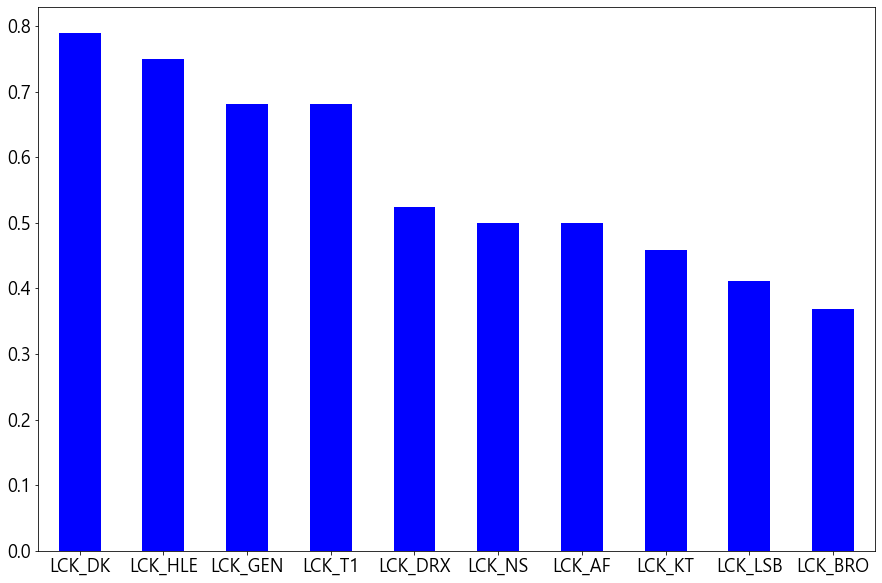

In [60]:
# HLE는 블루진영에서 유의미하게 높은 승률을 보여줬다.
LCK_VIC_Per2_Blue.plot(kind='bar',figsize=(15, 10),fontsize=18, color='Blue')
plt.xticks(rotation =0);

## 레드진영 승률 순위

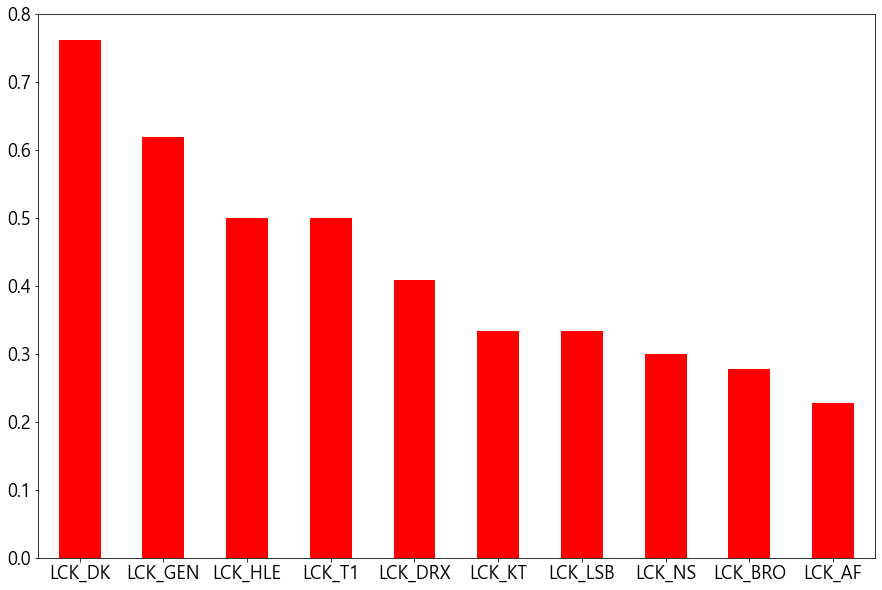

In [61]:
# AF는 레드진영에서 유의미하게 낮은 승률을 보여줬다.
LCK_VIC_Per2_Red.plot(kind='bar',figsize=(15, 10),fontsize=18, color='Red')
plt.xticks(rotation =0);

### 진영별 승률이 가장 많이 차이 나는 팀

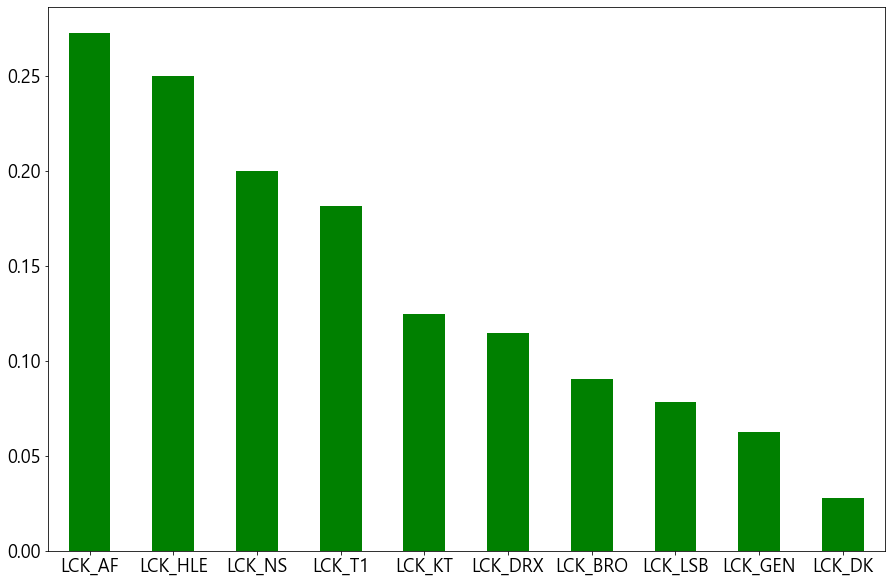

In [62]:
LCK_VIC_Per2_Dif.plot(kind='bar',figsize=(15, 10),fontsize=18, color='green')
plt.xticks(rotation =0);

### 통합 승률

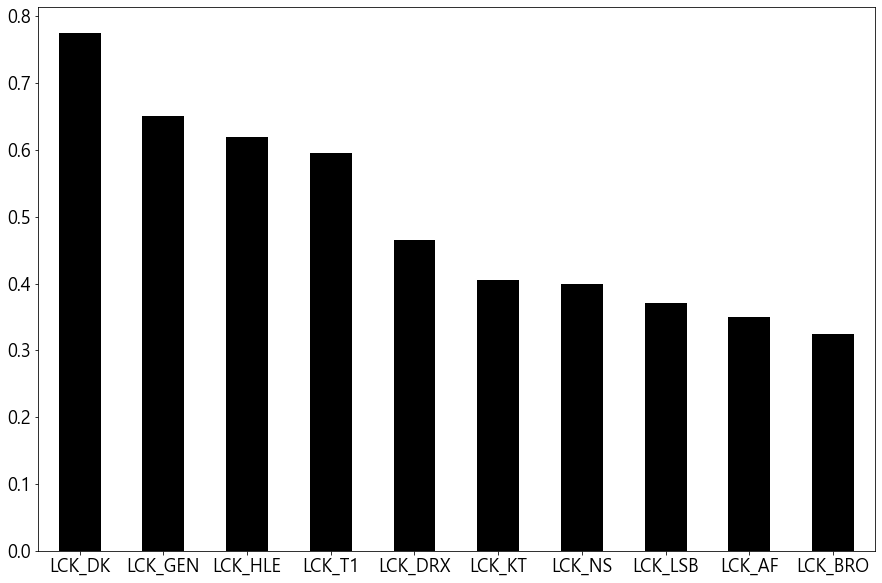

In [63]:
LCK_VIC_Per2['Vic'].plot(kind='bar', figsize=(15,10), fontsize=18, color='black')
plt.xticks(rotation=0);

### 승률 비교

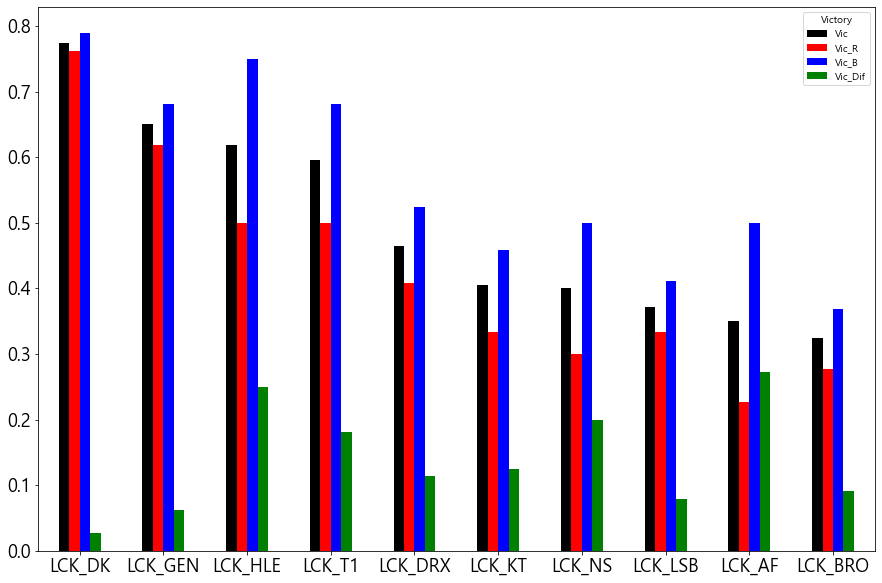

In [64]:
# DK는 통합승률, 레드진영, 블루진영 승률 큰 차이 없이 높았고 
# AF와 HLE는 블루진영 승률이 유의미하게 높았다.

colors = ['black','red','blue', 'green']
LCK_VIC_Per2.plot(kind='bar',figsize=(15, 10),fontsize=18, color=colors)
plt.xticks(rotation =0);

======================================================================================

# LCK 2021 Spring 한 게임당 가장 많은 와드를 설치한 선수

In [65]:
MostWards = LCK_Spring_Use.groupby(LCK_Spring_Use['Team Player']).mean().sort_values('Wards Placed', ascending = False).head(11)
MostWards

,Total_gold,Total_kill,Towers Destroyed,Inhibtors Destroyed,Baron,Dragon,Rift Heralds Slain,KDA,Total Damage to Champions,Total Damage Dealt,Total Damage to Objectives,Total Damage to Turrets,Wards Placed,Minions Killed
Team Player,,,,,,,,,,,,,,
AF MapSSi,65.800000,19.000000,2.000000,0.000000,1.000000,3.000000,1.000000,2.400000,11.500000,52.500000,5.600000,0.300000,68.000000,56.000000
NS Kellin,55.500000,11.250000,4.750000,0.750000,0.550000,2.275000,0.925000,4.180675,4.830000,17.647500,0.612500,0.142500,65.075000,34.950000
DRX Becca,59.006977,10.790698,6.116279,0.930233,0.697674,1.976744,0.604651,3.609459,4.334884,22.618605,1.176744,0.462791,59.883721,40.976744
KT Zzus,61.128571,11.333333,5.023810,0.714286,0.690476,1.785714,0.928571,3.764966,3.395238,16.878571,0.850000,0.161905,59.047619,41.333333
GEN Life,59.183721,12.279070,7.139535,1.186047,0.837209,2.418605,1.093023,4.646899,3.793023,15.576744,1.065116,0.337209,57.860465,29.976744
BRO Delight,55.624324,9.621622,3.837838,0.378378,0.459459,2.189189,0.567568,3.822458,4.029730,16.794595,1.256757,0.310811,57.135135,36.810811
T1 Keria,60.083333,13.595238,6.809524,1.214286,0.738095,2.285714,1.047619,5.740873,5.807143,30.257143,1.702381,0.590476,56.571429,48.261905
LSB Effort,57.797143,12.257143,5.371429,0.657143,0.400000,2.085714,1.257143,3.537619,3.871429,20.005714,1.171429,0.420000,56.200000,36.914286
AF Lehends,58.258974,11.384615,5.358974,0.923077,0.538462,2.435897,1.205128,3.816789,5.315385,29.179487,1.733333,0.656410,55.923077,42.897436


In [66]:
MostWards.drop('AF MapSSi', inplace = True) # AF MapSSi는 출전 경기횟수가 적어 제외

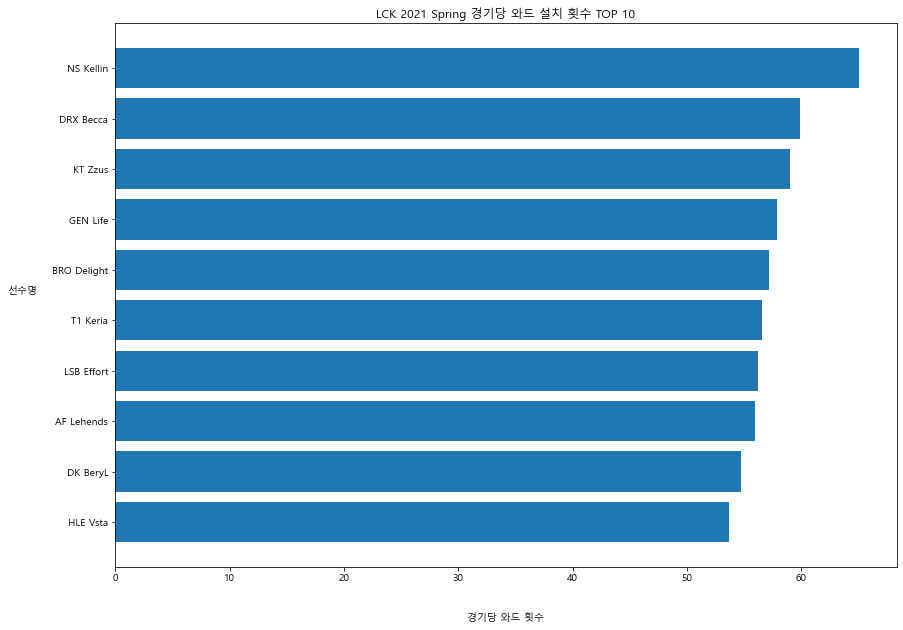

In [67]:
# 모두 팀의 주전 서포터이며 팀의 순위와 서포터의 와드 설치 횟수는 관계가 없어보인다.

plt.figure(figsize=(14,10))
plt.barh(MostWards.index, MostWards['Wards Placed'])
plt.ylabel("선수명", rotation = 360, labelpad = 30)
plt.xlabel("경기당 와드 횟수", rotation = 360, labelpad = 30)
plt.title("LCK 2021 Spring 경기당 와드 설치 횟수 TOP 10")
plt.gca().invert_yaxis() # 정렬

# LCK 2021 Spring KDA TOP 10

In [68]:
KDA10 = LCK_Spring_Use.groupby(LCK_Spring_Use['Team Player']).mean().sort_values('KDA', ascending = False)
KDA10

,Total_gold,Total_kill,Towers Destroyed,Inhibtors Destroyed,Baron,Dragon,Rift Heralds Slain,KDA,Total Damage to Champions,Total Damage Dealt,Total Damage to Objectives,Total Damage to Turrets,Wards Placed,Minions Killed
Team Player,,,,,,,,,,,,,,
T1 Cuzz,63.618182,16.818182,7.818182,1.727273,0.909091,2.272727,1.181818,10.530303,13.363636,197.000000,29.509091,1.454545,18.636364,42.727273
DK ShowMaker,63.080000,15.250000,8.050000,1.650000,1.125000,3.125000,1.225000,8.291250,18.875000,211.017500,13.387500,4.582500,16.525000,274.475000
T1 Faker,58.100000,13.761905,6.761905,1.047619,0.666667,2.142857,1.142857,7.774603,15.252381,157.280952,9.142857,3.023810,14.428571,238.761905
HLE Chovy,59.033333,14.380952,6.619048,0.904762,0.785714,2.595238,0.880952,7.536905,19.338095,217.064286,13.071429,4.295238,16.047619,296.642857
DK Ghost,63.080000,15.250000,8.050000,1.650000,1.125000,3.125000,1.225000,7.151667,16.397500,219.687500,19.302500,6.300000,26.700000,276.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KT Bonnie,56.733333,9.666667,4.500000,0.500000,0.500000,1.500000,0.833333,2.788889,8.283333,183.000000,23.933333,0.616667,29.666667,33.833333
LSB OnFleek,58.850000,11.000000,4.250000,0.500000,0.250000,0.500000,0.750000,2.541667,8.250000,188.775000,19.650000,2.125000,13.500000,67.250000
AF MapSSi,65.800000,19.000000,2.000000,0.000000,1.000000,3.000000,1.000000,2.400000,11.500000,52.500000,5.600000,0.300000,68.000000,56.000000


In [69]:
# KDA TOP10 지정할 때 20경기 이상 나온 선수만 뽑아보기
Over20 = LCK_Spring_Use['Team Player'].value_counts()
Over20

GEN Life         43
DRX BAO          43
DRX Pyosik       43
GEN Ruler        43
GEN Rascal       43
                 ..
GEN Flawless      5
LSB OnFleek       4
GEN Karis         3
BRO Chieftain     3
AF MapSSi         1
Name: Team Player, Length: 69, dtype: int64

In [70]:
KDA10_2 = LCK_Spring_Use.groupby(LCK_Spring_Use['Team Player']).mean().sort_values('KDA', ascending = False)
KDA10_2

,Total_gold,Total_kill,Towers Destroyed,Inhibtors Destroyed,Baron,Dragon,Rift Heralds Slain,KDA,Total Damage to Champions,Total Damage Dealt,Total Damage to Objectives,Total Damage to Turrets,Wards Placed,Minions Killed
Team Player,,,,,,,,,,,,,,
T1 Cuzz,63.618182,16.818182,7.818182,1.727273,0.909091,2.272727,1.181818,10.530303,13.363636,197.000000,29.509091,1.454545,18.636364,42.727273
DK ShowMaker,63.080000,15.250000,8.050000,1.650000,1.125000,3.125000,1.225000,8.291250,18.875000,211.017500,13.387500,4.582500,16.525000,274.475000
T1 Faker,58.100000,13.761905,6.761905,1.047619,0.666667,2.142857,1.142857,7.774603,15.252381,157.280952,9.142857,3.023810,14.428571,238.761905
HLE Chovy,59.033333,14.380952,6.619048,0.904762,0.785714,2.595238,0.880952,7.536905,19.338095,217.064286,13.071429,4.295238,16.047619,296.642857
DK Ghost,63.080000,15.250000,8.050000,1.650000,1.125000,3.125000,1.225000,7.151667,16.397500,219.687500,19.302500,6.300000,26.700000,276.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KT Bonnie,56.733333,9.666667,4.500000,0.500000,0.500000,1.500000,0.833333,2.788889,8.283333,183.000000,23.933333,0.616667,29.666667,33.833333
LSB OnFleek,58.850000,11.000000,4.250000,0.500000,0.250000,0.500000,0.750000,2.541667,8.250000,188.775000,19.650000,2.125000,13.500000,67.250000
AF MapSSi,65.800000,19.000000,2.000000,0.000000,1.000000,3.000000,1.000000,2.400000,11.500000,52.500000,5.600000,0.300000,68.000000,56.000000


In [76]:
Over20_2 = Over20.to_frame()
Over20_2

,Team Player
GEN Life,43
DRX BAO,43
DRX Pyosik,43
GEN Ruler,43
GEN Rascal,43
...,...
GEN Flawless,5
LSB OnFleek,4
GEN Karis,3
BRO Chieftain,3


In [77]:
Over20_2_Player_T = Over20_2[Over20_2['Team Player'] >= 20]
Over20_2_Player_T.tail()

,Team Player
T1 Ellim,22
T1 Teddy,21
T1 Gumayusi,21
T1 Clozer,21
T1 Faker,21


In [78]:
Over20_Player_Kda = pd.concat([Over20_2_Player_T,KDA10],axis=1, join='inner')
Over20_Player_Kda.sort_values('KDA', ascending=False, inplace=True)
Over20_Player_Kda_Top10 = Over20_Player_Kda.head(10)
Over20_Player_Kda_Top10

,Team Player,Total_gold,Total_kill,Towers Destroyed,Inhibtors Destroyed,Baron,Dragon,Rift Heralds Slain,KDA,Total Damage to Champions,Total Damage Dealt,Total Damage to Objectives,Total Damage to Turrets,Wards Placed,Minions Killed
DK ShowMaker,40,63.080000,15.250000,8.050000,1.650000,1.125000,3.125000,1.225000,8.291250,18.875000,211.017500,13.387500,4.582500,16.525000,274.475000
T1 Faker,21,58.100000,13.761905,6.761905,1.047619,0.666667,2.142857,1.142857,7.774603,15.252381,157.280952,9.142857,3.023810,14.428571,238.761905
HLE Chovy,42,59.033333,14.380952,6.619048,0.904762,0.785714,2.595238,0.880952,7.536905,19.338095,217.064286,13.071429,4.295238,16.047619,296.642857
DK Ghost,40,63.080000,15.250000,8.050000,1.650000,1.125000,3.125000,1.225000,7.151667,16.397500,219.687500,19.302500,6.300000,26.700000,276.400000
GEN Clid,38,58.865789,12.342105,7.263158,1.236842,0.868421,2.473684,1.184211,6.951462,9.660526,175.671053,28.447368,1.257895,23.605263,32.973684
T1 Teddy,21,62.966667,15.809524,7.619048,1.666667,0.904762,2.476190,1.142857,6.938889,19.585714,233.852381,21.233333,6.238095,24.238095,263.714286
HLE Morgan,34,60.579412,15.382353,7.176471,1.058824,0.941176,2.794118,0.941176,6.690686,13.958824,156.870588,6.820588,3.088235,12.941176,235.941176
GEN Bdd,40,59.222500,12.650000,7.225000,1.250000,0.875000,2.475000,1.100000,6.689167,15.815000,186.182500,9.735000,3.030000,15.100000,272.600000
LSB FATE,35,57.797143,12.257143,5.371429,0.657143,0.400000,2.085714,1.257143,6.682857,17.714286,208.305714,8.045714,2.408571,15.342857,279.628571
T1 Ellim,22,59.136364,12.318182,6.681818,0.954545,0.636364,2.545455,1.000000,6.615152,8.063636,174.486364,26.090909,0.913636,21.090909,34.454545


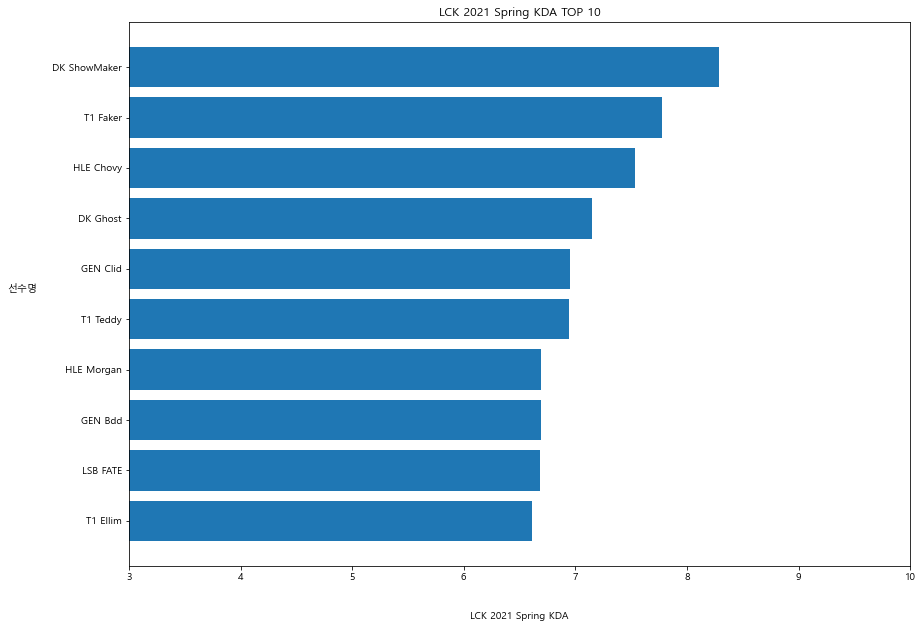

In [79]:
# LCK 2021 Spring(정규시즌)에 20세트 이상 출전한 선수들 중 KDA TOP 10

plt.figure(figsize=(14,10))
plt.barh(Over20_Player_Kda_Top10.index, Over20_Player_Kda_Top10['KDA'])
plt.ylabel("선수명", rotation = 360, labelpad = 30)
plt.xlabel("LCK 2021 Spring KDA", rotation = 360, labelpad = 30)
plt.xlim(3, 10, 0.5)
plt.title("LCK 2021 Spring KDA TOP 10")
plt.gca().invert_yaxis() # 정렬

# LCK 2021 Spring Team Stats

In [80]:
TeamStats_Spring

,Team,GP,W,L,AGT,K,D,KD,CKPM,GPR,...,FD%,DRG%,ELD%,FBN%,BN%,LNE%,JNG%,WPM,CWPM,WCPM
0,Afreeca Freecs,42,16,26,33.5,509,579,0.88,0.77,0.15,...,55%,54%,29%,40%,41%,49.4%,48.5%,3.73,1.52,1.87
1,DRX,47,21,26,33.7,518,599,0.86,0.71,-0.34,...,32%,41%,50%,49%,48%,49.9%,50.5%,3.73,1.34,1.75
2,DWG KIA,43,33,10,33.3,647,486,1.33,0.79,0.82,...,51%,65%,60%,70%,74%,49.5%,56.3%,3.81,1.48,1.78
3,Fredit BRION,39,12,27,32.8,361,469,0.77,0.65,-1.10,...,54%,46%,40%,28%,33%,49.1%,46.5%,3.97,1.55,1.94
4,Gen.G,44,29,15,32.3,547,435,1.26,0.69,0.69,...,68%,56%,50%,73%,72%,51.1%,51.5%,4.03,1.57,1.98
5,Hanwha Life Esports,44,26,18,31.9,614,535,1.15,0.82,0.29,...,55%,58%,60%,50%,53%,51.0%,50.4%,3.68,1.47,1.95
6,KT Rolster,45,18,27,34.3,500,574,0.87,0.69,-0.51,...,31%,37%,45%,38%,43%,50.0%,48.5%,3.97,1.48,1.83
7,Liiv SANDBOX,40,15,25,32.6,480,553,0.87,0.79,-0.29,...,45%,44%,43%,33%,32%,50.2%,45.7%,3.68,1.54,1.88
8,Nongshim RedForce,42,18,24,32.2,476,551,0.86,0.76,-0.60,...,52%,50%,75%,45%,44%,49.3%,49.4%,3.68,1.30,1.78
9,T1,44,27,17,32.7,612,494,1.24,0.77,0.81,...,59%,52%,60%,55%,58%,50.5%,51.8%,3.67,1.41,1.72


In [82]:
# 숫자형으로 변환
TeamStats_Spring['FB%'] = TeamStats_Spring['FB%'].str.strip('%').apply(pd.to_numeric)
TeamStats_Spring['FT%'] = TeamStats_Spring['FT%'].str.strip('%').apply(pd.to_numeric)
TeamStats_Spring['F3T%'] = TeamStats_Spring['F3T%'].str.strip('%').apply(pd.to_numeric)
TeamStats_Spring['HLD%'] = TeamStats_Spring['HLD%'].str.strip('%').apply(pd.to_numeric)
TeamStats_Spring['FD%'] = TeamStats_Spring['FD%'].str.strip('%').apply(pd.to_numeric)
TeamStats_Spring['DRG%'] = TeamStats_Spring['DRG%'].str.strip('%').apply(pd.to_numeric)
TeamStats_Spring['ELD%'] = TeamStats_Spring['ELD%'].str.strip('%').apply(pd.to_numeric)
TeamStats_Spring['FBN%'] = TeamStats_Spring['FBN%'].str.strip('%').apply(pd.to_numeric)
TeamStats_Spring['BN%'] = TeamStats_Spring['BN%'].str.strip('%').apply(pd.to_numeric)
TeamStats_Spring['LNE%'] = TeamStats_Spring['LNE%'].str.strip('%').apply(pd.to_numeric)
TeamStats_Spring['JNG%'] = TeamStats_Spring['JNG%'].str.strip('%').apply(pd.to_numeric)

In [83]:
sorted(TeamStats_Spring.columns)

['AGT',
 'BN%',
 'CKPM',
 'CWPM',
 'D',
 'DRG%',
 'EGR',
 'ELD%',
 'F3T%',
 'FB%',
 'FBN%',
 'FD%',
 'FT%',
 'GD15',
 'GP',
 'GPR',
 'GSPD',
 'HLD%',
 'JNG%',
 'K',
 'KD',
 'L',
 'LNE%',
 'MLR',
 'Team',
 'W',
 'WCPM',
 'WPM']

* AGT	Average game time/duration, in minutes

* BN%	Baron control rate

* CKPM	Average combined kills per minute (team kills + opponent kills)

* CWPM	Control wards purchased per minute

* D	Total deaths

* DRG%	Dragon control rate: percent of all Dragons killed that were taken by the team, reflecting only elemental drakes if ELD% is present

* EGR	Early-Game Rating

* ELD%	Elder dragon control rate

* F3T%	First-to-three-towers rate (percentage of games in which team was the first to 3 tower kills

* FB%	First Blood rate -- for players/champions, percent of games earning a First Blood participation (kill or assist)

* FBN%	First Baron rate

* FD%	First dragon rate

* FT%	First tower rate

* GD15	Average gold difference at 15 minutes

* GP	Games Played

* GPR	Gold percent rating (average amount of game’s total gold held, relative to 50%)

* GSPD	Average gold spent percentage difference

* HLD%	Rift Herald control rate

* JNG%	Jungle Control: average share of game’s total jungle CS

* K	Total kills

* KD	Kill-to-Death Ratio

* L	Losses

* LNE%	Lane Control: average share of game’s total lane CS

* MLR	Mid/Late Rating

* Team	Team name

* W	Wins

* WCPM	Average wards cleared per minute

* WPM	Average wards placed per minute

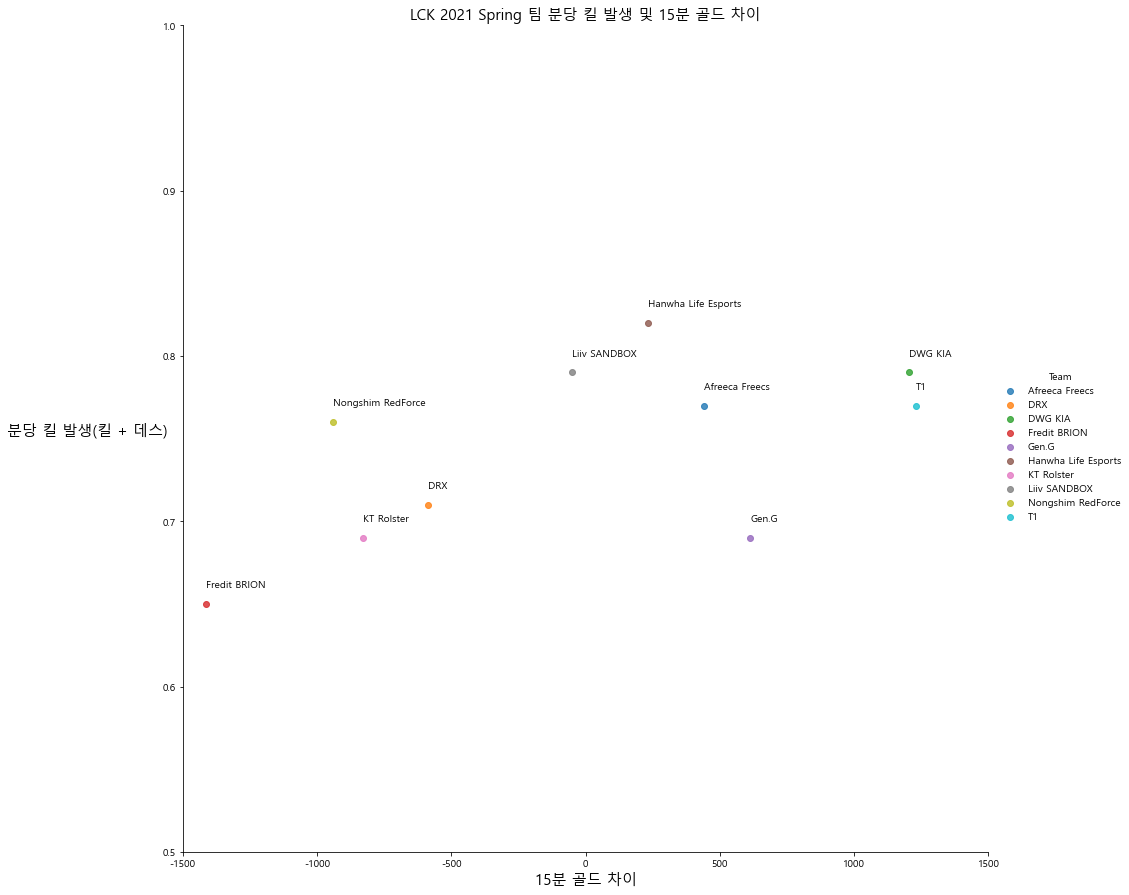

In [86]:
# 4사분면으로 나누지 않은 차트
GPR_KD = sns.lmplot(x='GD15', y='CKPM', hue = 'Team', data=TeamStats_Spring, fit_reg=False, truncate=False, height = 12)
sns.regplot(x='GD15', y='CKPM', data=TeamStats_Spring, scatter=False, ax=GPR_KD.axes[0, 0])

GPR_KD.set(ylim=(0.5, 1))
GPR_KD.set(xlim=(-1500, 1500))

for i in range(TeamStats_Spring.shape[0]):
 plt.text(x=TeamStats_Spring.GD15[i]+0.5,y=TeamStats_Spring.CKPM[i]+0.01,s=TeamStats_Spring.Team[i], 
          fontdict=dict(color = 'Black',size=10))

plt.xlabel('15분 골드 차이', fontsize = 15)
plt.ylabel('분당 킬 발생(킬 + 데스)', rotation= 360, labelpad = 75, fontsize = 15)
plt.title('LCK 2021 Spring 팀 분당 킬 발생 및 15분 골드 차이', fontsize = 15);

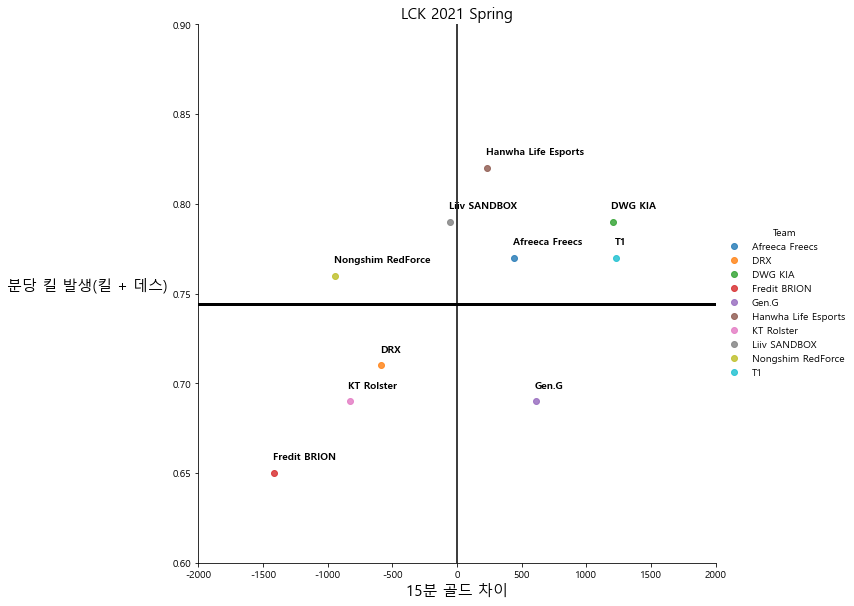

In [93]:
# 킬 발생, 15분 골드 차이를 기준으로 4사분면으로 나눈 차트
# 분당 킬 발생(CKPM)은 교전지향적인 팀인지 교전을 피하는 팀인지 확인하는 지표
# 15분 골드차이(GD15)는 초반부터 상대를 압박하고, 교전에서 이득을 보는지 여부를 나타내는 지표

GPR_KD = sns.lmplot(x='GD15', y='CKPM', hue = 'Team', data=TeamStats_Spring, fit_reg=False, truncate=False, height = 8)
#sns.regplot(x='GD15', y='CKPM', data=df, scatter=False, ax=GPR_KD.axes[0,0])

GPR_KD.set(ylim=(0.6, 0.9))
GPR_KD.set(xlim=(-2000, 2000))

for i in range(TeamStats_Spring.shape[0]):
 plt.text(x=TeamStats_Spring.GD15[i]-10,
          y=TeamStats_Spring.CKPM[i]+0.0075,
          s=TeamStats_Spring.Team[i], 
          fontdict=dict(fontweight = 'bold',size=10))

plt.axhline(y=TeamStats_Spring['CKPM'].mean(),color='black',label='평균 CKPM',linewidth=3)
plt.axvline(x=0, color='black')

plt.xlabel('15분 골드 차이', fontsize = 15)
plt.ylabel('분당 킬 발생(킬 + 데스)', rotation= 360, labelpad = 85, fontsize = 15)
plt.title('LCK 2021 Spring', fontsize = 15);